In [2]:
%time
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
datapath = r'E:\Kaggle参赛\TaiTannike\train.csv'
train = pd.read_csv(datapath)
# 查看数据概要信息
train.info()
# 数据概要可以看出，有一些列的数据是缺失的，如Age只有714行有数据

Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 数据描述信息
train.describe()
# 可以从Survived的mean字段看出，有0.383838比例获救，
# 其中从Pclass看出2.308642/3等舱或就认输最多，获救年龄平均为29.699118（注意此时忽略了无记录行)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


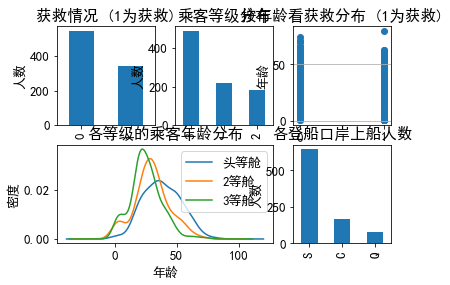

In [4]:
# 显示中文的设置
plt.rc('font', family='SimHei', size=13)
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
# 获救人数柱状图
plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数")  
# 各个等级舱人数分布
plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")
# 按照年龄查看获救情况
plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived, train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")
# 各个等级舱人数分布
plt.subplot2grid((2,3),(1,0), colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')   
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # 设置图例
# 各个登船口人数分布
plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
plt.show()

# 根据属性分析存活率

<Figure size 432x288 with 0 Axes>

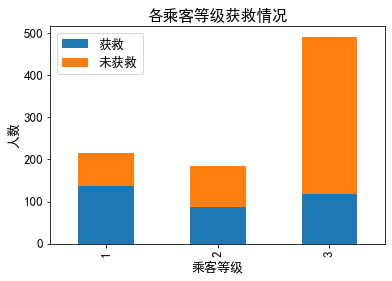

In [5]:
fig = plt.figure()
fig.set(alpha=0.2)
#设置中文显示和负号显示
plt.rc('font',family='SimHei',size=13)
plt.rcParams['axes.unicode_minus'] = False
# 首先各乘客等级获救情况，因为Pclass属性没有缺失值！！
Survived_0 = train.Pclass[train.Survived==0].value_counts()
Survived_1 = train.Pclass[train.Survived==1].value_counts()
df = pd.DataFrame({u'获救':Survived_1,u'未获救':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title(u'各乘客等级获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()

分析上图可知，1等舱获救率是最高的(有钱就是牛逼)

<Figure size 432x288 with 0 Axes>

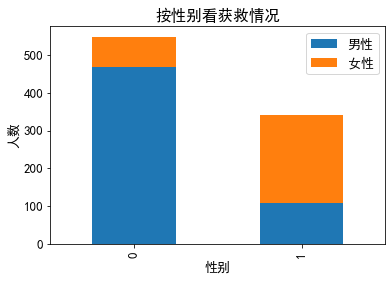

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='SimHei',size=13)
# 从性别分析获救率
Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'男性':Survived_m,u'女性':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title(u'按性别看获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')
plt.show()

分析上图可知获救者中女性居多

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)
plt.rc('font',family='SimHei',size=13)
plt.rcParams['axes.unicode_minus'] = False
# 具体分析数据
